In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
from numpy import cos, sin
%matplotlib inline

from nsmod.manual_switching_torque_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

In [44]:
c = 3e10
R = 1e6
def SignalModel_FP(theta, t):
    omega0, epsI, a0, chi = theta

    k = 2/3.0 * R/c * epsA
    wz0 = omega0 *np.cos(a0)
    
    psidot = -epsI*omega0 + k*epsI*wz0**3*t
    psi = psidot*t + np.pi/2.
    psi = -epsI*omega0*t + 0.5*k*epsI*wz0**3*t**2 + np.pi/2.
    return (psidot**2*(2*(sin(chi)*cos(a0) - sin(a0)*sin(psi)*cos(chi))
                      *(sin(chi)*sin(a0)*sin(psi) + cos(chi)*cos(a0))*sin(chi)
                      - ((sin(chi)*sin(psi)*cos(a0) - sin(a0)*cos(chi))**2
                      + sin(chi)**2*cos(psi)**2)*cos(chi))*sin(chi)*sin(a0)
                      *cos(psi)/((sin(chi)*sin(psi)*cos(a0)
                    - sin(a0)*cos(chi))**2 
                      + sin(chi)**2*cos(psi)**2)**2
                        ) / (2*np.pi) 

def SignalModel_EM(theta, t):
    omega0, epsI, a0, chi, epsA = theta
    
    psi = -epsI*omega0*t + np.pi/2.

    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = 1 - epsI * sin(chi) * (cos(a0) *sin(chi) - sin(psi) * sin(a0) * cos(chi)) / (
                        (sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)

    # Standard values for c , R in cgs
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA * omega0**3 
    return -k * Phidot**3 * Sin2Theta / (2*np.pi)

def SignalModel_EM2(theta, t):
    omega0, epsI, a0, chi, epsA = theta
    psidot = -epsI*omega0
    psi = psidot*t + np.pi/2.

    GEOMETRIC = (psidot**2*(2*(sin(chi)*cos(a0) - sin(a0)*sin(psi)*cos(chi))
                      *(sin(chi)*sin(a0)*sin(psi) + cos(chi)*cos(a0))*sin(chi)
                      - ((sin(chi)*sin(psi)*cos(a0) - sin(a0)*cos(chi))**2
                      + sin(chi)**2*cos(psi)**2)*cos(chi))*sin(chi)*sin(a0)
                      *cos(psi)/((sin(chi)*sin(psi)*cos(a0)
                    - sin(a0)*cos(chi))**2 
                      + sin(chi)**2*cos(psi)**2)**2
                        ) / (2*np.pi) 
    

    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = 1 - epsI * sin(chi) * (cos(a0) *sin(chi) - sin(psi) * sin(a0) * cos(chi)) / (
                        (sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)

    # Standard values for c , R in cgs
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA * omega0**3 
    PHIDDOT = -k * Phidot**3 * Sin2Theta / (2*np.pi)

    return PHIDDOT + GEOMETRIC

def SignalModel_EM3(theta, t):
    omega0, epsI, a0, chi, epsA = theta
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA
    wz0 = omega0 *np.cos(a0)
    wz = wz0 -k * wz0**3 * t   
    psi = -epsI*omega0*t + 0.5*k*epsI*wz0**3*t**2 + np.pi/2.

    phiddot = -(1+epsI) * k * wz0**3

    psiddot = k * epsI* wz0**3
    
    psidot = -epsI*wz0 + k*epsI*wz0**3*t
    
    psidot2 = (epsI*wz0)**2 + 2*k*epsI**2*wz0**4*t
    
    f = sin(chi)*(cos(a0)*sin(chi) - sin(psi)*sin(a0)*cos(chi)) / (
        (sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)
    
    fdot = ((-sin(a0)**2*sin(chi)**2*sin(psi)**2*cos(chi) - 2*sin(a0)**2*sin(chi)**2*cos(chi) 
            - sin(a0)**2*cos(chi)**3 + 2*sin(a0)*sin(chi)**3*sin(psi)*cos(a0)
            + sin(chi)**2*cos(chi))*sin(a0)*sin(chi)*cos(psi)/(
           (sin(a0)*cos(chi) - sin(chi)*sin(psi)*cos(a0))**2 + sin(chi)**2*cos(psi)**2)**2)

    T1 = phiddot*0 + psiddot * f + psidot2 * fdot 
    
    T4 = -k * (wz**3  * sin(chi)**2
                    + a0 * (
                    3*wz**2 * psidot * np.tan(chi) * np.sin(psi) * sin(chi)**2 - 
                    2*wz**3 * sin(psi) * sin(chi) * cos(chi))
                   )  
    #PHIDDOT = -k * Phidot**3 * Sin2Theta / (2*np.pi)

    return  (T1 + T4) /(2*np.pi)

## Low EM amplification

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 1.0000000000e+00
Bs : 4.2426406871e+13
DeltaPhi_49 : 8.5311208489e-04
DeltaPhi_49_SpindownTorque : 3.5717464664e-09
DeltaPhi_63 : 1.3220606932e-06
DeltaPhi_75 : 4.7207804335e-07
DeltaPhi_TS : -0.0000000000e+00
EMtorqueAmplificationfactor : 4.8684999718e-03
P : 1.0005072145e-01
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 1.0000000000e+02
T : 1.0000000000e+04
a0 : 2.0000000000e+00
beta : -2.3326979465e-05
chi0 : 8.8600000000e+01
delta_omega_dot0_FP : 3.0280358132e-09
delta_omega_dot0_FP_EM : 4.6925218819e-12
epsA : 5.0000000000e-10
epsI1 : 0.0000000000e+00
epsI3 : 3.0000000000e-05
n : 5.0000000000e+04
nu_dot0 : -4.3772084811e-10
omega0 : 6.2800000000e+01
omega_dot0 : -2.7502812015e-09
source_script : Unknown
tauA : 2.0010144290e+08
tauE : 2.2834028741e+10
tauP : 3.3350240484e+03
tauS : 2.2820398393e+10
upsilon : 0.0000000000e+00
wobble_angle : 3.4907138319e-02
wobble_angle_spindown : 1.4614662030e-07
BE

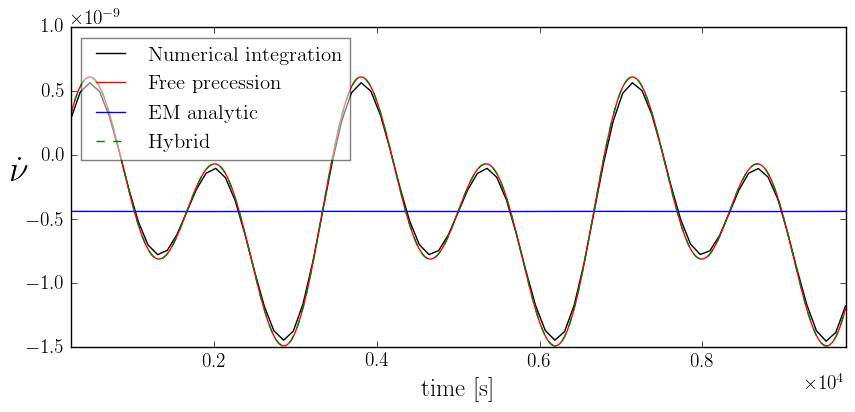

In [3]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameters
epsI3 = 3e-5
omega0 = 2*np.pi*10
epsA = 5e-10
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3 * tauP
a0 = 2.0

n = 50000
error = 1e-13

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=True)

File_Functions.PrintParameterDictionary(file_name)

ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=7, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# Simple analytic
theta_FP= np.array([omega0, epsI3, np.radians(a0), np.radians(chi0)])
ax1.plot(time, nu_dot0 + SignalModel_FP(theta_FP, time), "-", color='r', label="Free precession")

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM(theta_EM, time), color="b", label="EM analytic")

# EM2 model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM2(theta_EM, time), "--", color="g", label="Hybrid")

ax1.legend(frameon=True, loc='best', framealpha=0.5)

#ax1.set_title("EM amplification factor = {:2.4f}".format(PD['EMtorqueAmplificationfactor']))
plt.savefig("img/DoublePeaked_LowAem.pdf")
File_Functions.PropertiesTable(file_name, "DoublePeaked_LowAem.tex")
plt.show()

## High EM amplification

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
AnomTorqueSwitching : 1.0000000000e+00
Bs : 4.2426406871e+13
DeltaPhi_49 : 8.5860522881e-04
DeltaPhi_49_SpindownTorque : 5.3574696908e-06
DeltaPhi_63 : 2.9937900882e-02
DeltaPhi_75 : 1.0758982212e-02
DeltaPhi_TS : -0.0000000000e+00
EMtorqueAmplificationfactor : 1.0954124937e+02
P : 1.0005072145e-03
SpindownTorqueSwitching : 1.0000000000e+00
SwitchTime : 1.0000000000e+02
T : 1.0000000000e+03
a0 : 2.0000000000e+00
beta : -3.4977454571e-04
chi0 : 8.8600000000e+01
delta_omega_dot0_FP : 1.3457936947e-07
delta_omega_dot0_FP_EM : 4.6925218819e-06
epsA : 5.0000000000e-10
epsI1 : 0.0000000000e+00
epsI3 : 2.0000000000e-06
n : 1.0000000000e+05
nu_dot0 : -4.3772084811e-04
omega0 : 6.2800000000e+03
omega_dot0 : -2.7502812015e-03
source_script : Unknown
tauA : 2.0010144290e+06
tauE : 2.2834028741e+06
tauP : 5.0025360726e+02
tauS : 2.2820398393e+06
upsilon : 0.0000000000e+00
wobble_angle : 3.5131903550e-02
wobble_angle_spindown : 2.1921379248e-04
BE

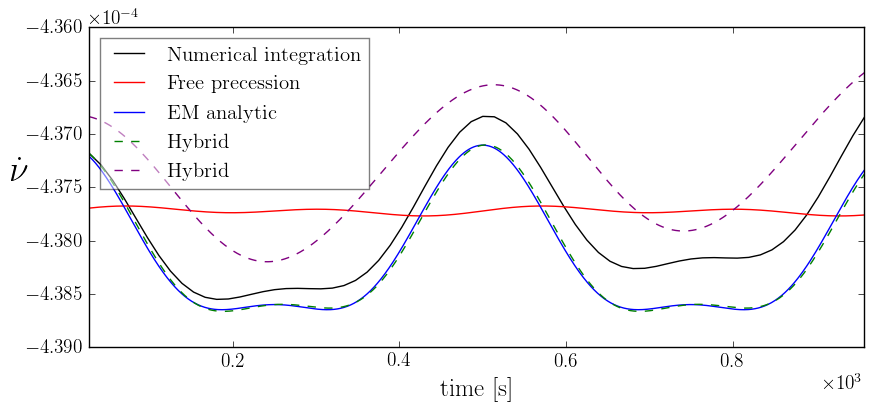

In [45]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameters
epsI3 = 2e-6
omega0 = 2*np.pi*1000
epsA = 5e-10
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 2 * tauP
a0 = 2.0

n = 100000
error = 1e-11

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=True)

File_Functions.PrintParameterDictionary(file_name)

ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=9, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# Simple analytic
theta_FP= np.array([omega0, epsI3, np.radians(a0), np.radians(chi0)])
ax1.plot(time, nu_dot0 + SignalModel_FP(theta_FP, time), "-", color='r', label="Free precession")

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM(theta_EM, time), color="b", label="EM analytic")

# EM2 model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM2(theta_EM, time), "--", color="g", label="Hybrid")

# EM3 model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM3(theta_EM, time), "--", color="purple", label="Hybrid")

ax1.legend(frameon=True, loc='best', framealpha=0.5)
plt.savefig("img/DoublePeaked_HighAem.pdf")
File_Functions.PropertiesTable(file_name, "DoublePeaked_HighAem.tex")
#ax1.set_title("EM amplification factor = {:2.4f}".format(PD['EMtorqueAmplificationfactor']))
plt.show()



## Intermediate

BETA FUNCTION IS USED
BETA FUNCTION IS USED
BETA FUNCTION IS USED


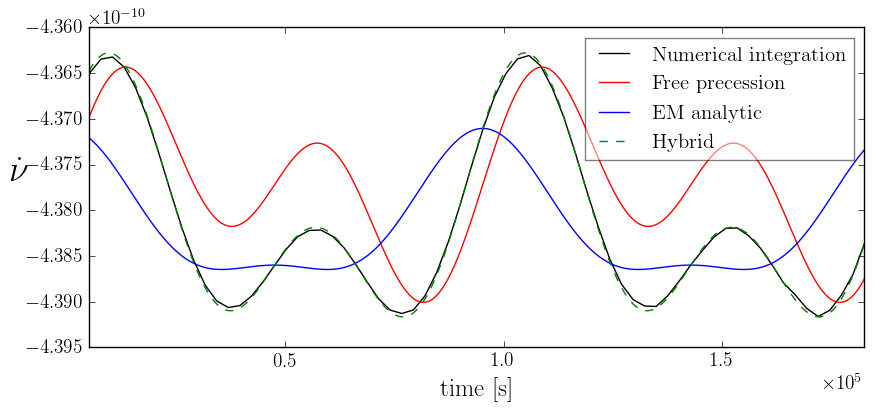

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameters
epsI3 = 1.05e-6
omega0 = 2*np.pi*10
epsA = 5e-10
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 2 * tauP
a0 = 2.0

n = 100000
error = 1e-14

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                 AnomTorque=True)

#File_Functions.PrintParameterDictionary(file_name)

ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=9, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# Simple analytic
theta_FP= np.array([omega0, epsI3, np.radians(a0), np.radians(chi0)])
ax1.plot(time, nu_dot0 + SignalModel_FP(theta_FP, time), "-", color='r', label="Free precession")

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM(theta_EM, time), color="b", label="EM analytic")

# EM2 model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM2(theta_EM, time), "--", color="g", label="Hybrid")

ax1.legend(frameon=True, loc='best', framealpha=0.5)
plt.savefig("img/DoublePeaked_IntAem.pdf")
File_Functions.PropertiesTable(file_name, "DoublePeaked_IntAem.tex")
#ax1.set_title("EM amplification factor = {:2.4f}".format(PD['EMtorqueAmplificationfactor']))
plt.show()

### Range of values

BETA FUNCTION IS USED
BETA FUNCTION IS USED
0.010031020294
4787.11585894
BETA FUNCTION IS USED
BETA FUNCTION IS USED
1.0031020294
47871.1585894
BETA FUNCTION IS USED
BETA FUNCTION IS USED
50.0097011349
338009.194094


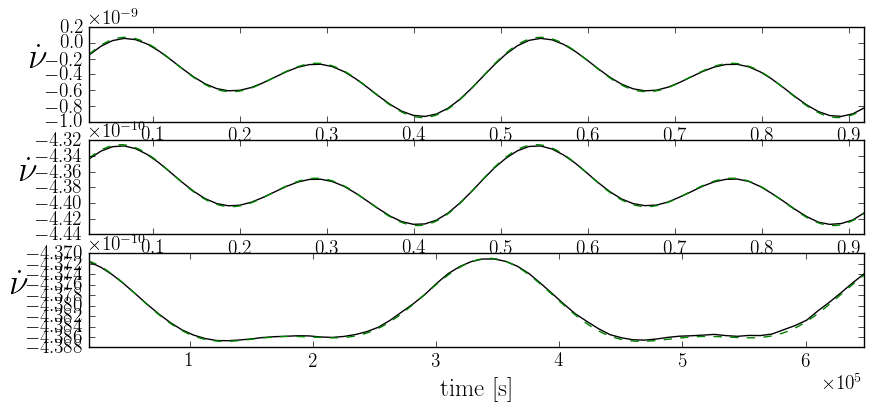

In [6]:
fig, axes = plt.subplots(nrows=3, figsize=(10, 4))

# Parameters
omega0 = 2*np.pi*10
epsA = 5e-10
chi0 = 88.6
a0 = 2.0
n = 100000
error = 1e-13

Aem_list = [0.01, 1.0, 50.0]

R = 1e6
c = 3e10
    
for i, Aem in enumerate(Aem_list):
    epsI3 = np.sqrt(4*np.pi/3 * R*omega0/c * sin(np.radians(chi0))**2 * epsA/Aem)
    tauP = 2 * np.pi/abs(epsI3 * omega0)
    T = 2 * tauP
    # Exact numerical result
    file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                     n=n, error=error, a0=a0, cleanup=False, DryRun=False, 
                     AnomTorque=True)

    ax1 = Plot.SpindownRate(file_name, ax=axes[i], analytic="", divisor=9, label="Numerical integration")
    PD = File_Functions.Parameter_Dictionary(file_name)
    print PD['EMtorqueAmplificationfactor']
    print PD['tauP']

    # EM2 model
    time = np.linspace(0, T, 1000)
    theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
    ax1.plot(time, SignalModel_EM2(theta_EM, time), "--", color="g", label="Hybrid")

#ax1.legend(frameon=True, loc='best', framealpha=0.5)
#plt.savefig("img/DoublePeaked_HighAem.pdf")
#File_Functions.PropertiesTable(file_name, "DoublePeaked_HighAem.tex")

plt.show()